In [ ]:
#### some good resources 
#### https://www.enjoyalgorithms.com/blog/topic-modelling-using-lda-lsa 

#### Package installs in the notebook

In [6]:
!python -m pip install scipy==1.12

  Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 38.7 MB/s  0:00:01 eta 0:00:01
Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy━━━━━━━━━━━━━━━━━━━ 0/2 [numpy]
    Found existing installation: scipy 1.13.1 0/2 [numpy]
    Uninstalling scipy-1.13.1:0m╺━━━━━━━━━━━━━━━━━━━ 1/2 [scipy]
      Successfully uninstalled scipy-1.13.1━━━━━━━━━━━━━━━━━━━ 1/2 [scipy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scipy]32m1/2 [scipy]


In [9]:
!python -m pip install nltk

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [nltk]3/4 [nltk]]


In [15]:
!python -m pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [4]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.7 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.3
    Uninstalling pip-25.3:
      Successfully uninstalled pip-25.3


In [5]:
!python -m pip install matplotlib

In [3]:
!python -m pip install matplotlib-inline

  Using cached matplotlib_inline-0.2.1-py3-none-any.whl.metadata (2.3 kB)
Using cached matplotlib_inline-0.2.1-py3-none-any.whl (9.5 kB)


In [19]:
!python -m pip install umap

ERROR: Could not find a version that satisfies the requirement umap (from versions: none)
ERROR: No matching distribution found for umap


In [1]:
pip list

Package             Version
------------------- -----------
appnope             0.1.4
asttokens           3.0.1
click               8.1.8
comm                0.2.3
contourpy           1.3.0
cycler              0.12.1
debugpy             1.8.20
decorator           5.2.1
et_xmlfile          2.0.0
exceptiongroup      1.3.1
executing           2.2.1
fonttools           4.60.2
funcy               2.0
gensim              3.4.0
importlib_metadata  8.7.1
importlib_resources 6.5.2
ipykernel           6.31.0
ipython             8.18.1
jedi                0.19.2
Jinja2              3.1.6
joblib              1.5.3
jupyter_client      8.6.3
jupyter_core        5.8.1
kiwisolver          1.4.7
MarkupSafe          3.0.3
matplotlib          3.9.0
matplotlib-inline   0.2.1
nest-asyncio        1.6.0
nltk                3.9.2
numexpr             2.10.2
numpy               1.26.4
openpyxl            3.1.5
packaging           26.0
pandas              2.3.3
parso               0.8.6
pexpect             4.9.0

### Import dependencies and data

#### Dependencies

In [4]:
import sys
import os
#import numpy as np
import pandas as pd
import re
from importlib import reload
import openpyxl
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim, logging, warnings
from gensim.utils import lemmatize, simple_preprocess
import pyLDAvis.gensim

from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#from importlib import reload
import numpy as np

/Users/tylerhinnendael/Desktop/Data Science /Topic_modeling/venv_lda/lib/python3.9/site-packages/matplotlib/_fontconfig_pattern.py:64: PyparsingDeprecationWarning: 'oneOf' deprecated - use 'one_of'
  prop = Group((name + Suppress("=") + comma_separated(value)) | oneOf(_CONSTANTS))
/Users/tylerhinnendael/Desktop/Data Science /Topic_modeling/venv_lda/lib/python3.9/site-packages/matplotlib/_fontconfig_pattern.py:85: PyparsingDeprecationWarning: 'parseString' deprecated - use 'parse_string'
  parse = parser.parseString(pattern)
/Users/tylerhinnendael/Desktop/Data Science /Topic_modeling/venv_lda/lib/python3.9/site-packages/matplotlib/_fontconfig_pattern.py:89: PyparsingDeprecationWarning: 'resetCache' deprecated - use 'reset_cache'
  parser.resetCache()
/Users/tylerhinnendael/Desktop/Data Science /Topic_modeling/venv_lda/lib/python3.9/site-packages/matplotlib/_fontconfig_pattern.py:85: PyparsingDeprecationWarning: 'parseString' deprecated - use 'parse_string'
  parse = parser.parseString(p

In [5]:
# dir_root deleted for privacy 
dir_root = os.getcwd() 
dir_modules = dir_root + '/topic_modeling/'
dir_data = dir_root + '/data/'
dir_models = dir_root + '/models/'
dir_viz = dir_root + '/visualizations/'

In [6]:
os.chdir(dir_modules)
import topic_modeling_LDA as lda

Successfully imported pyLDAvis


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tylerhinnendael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Statistical (Probabilistic) Approach

#### Training data for base LDA model

- synthetic training developed by adding ChatGPT to write 100 sentences with 3 different categories (unlabeled)

In [8]:
os.chdir(dir_data)
train = pd.read_excel('lda_train_data.xlsx').drop(columns = 'Unnamed: 0')

corpus_list = list(train['train_raw'])
len(corpus_list)

99

In [9]:
train.head()

,train_raw
0,Energy efficiency reduces costs and emissions.
1,Renewable energy supports a cleaner grid.
2,Energy storage stabilizes power supply.
3,Smart grids optimize energy distribution.
4,Energy audits identify savings opportunities.


## Unsupervised topic modeling - Latent Dirichlet Allocation (LDA)

LDA is a probabilistic unsupervised modeling technique. It will provide the most probable topic. 
I designed functions to assign the most probable word for each topic as well, out of a list of n_top_words.

Resource: 

### Prepare the training data

regardless of training or inferencing

- Preprocess
- tokenize
- skip lemmatization (needs to be added)
- create dictionary and corpus

In [ ]:
# Note - depending on the complexity of the training and inference data, preprocesing will need to be a lot more robust.
# this is a simple example with little cleaning needed.

In [7]:
# some implementations name 'train_dictionary' as 'id2word', but to me that's not very clear
train_data, train_corpus_data, train_corpus, train_dictionary = lda.automate_corpus_prep(train, 'train_raw')

preprocessed...
tokenized...
dictionary and corpus created


In [8]:
print(train_data.shape)
train_data.head()

(99, 3)


,train_raw,corpus_clean,tokens
0,Energy efficiency reduces costs and emissions.,energy efficiency reduces costs and emissions,"[energy, efficiency, reduces, costs, emissions]"
1,Renewable energy supports a cleaner grid.,renewable energy supports a cleaner grid,"[renewable, energy, supports, cleaner, grid]"
2,Energy storage stabilizes power supply.,energy storage stabilizes power supply,"[energy, storage, stabilizes, power, supply]"
3,Smart grids optimize energy distribution.,smart grids optimize energy distribution,"[smart, grids, optimize, energy, distribution]"
4,Energy audits identify savings opportunities.,energy audits identify savings opportunities,"[energy, audits, identify, savings, opportunit..."


In [9]:
train_dictionary

### Model training

- skip if inferencing on pretrained

#### (Option 1) Build model with predetermined hyperparams

In [10]:
num_topics = 3
chunksize = 5

In [12]:
# build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=train_corpus,
                                            id2word=train_dictionary,
                                            num_topics=num_topics, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=chunksize,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [13]:
lda_model

In [33]:
# get coherence score
# on a scale of 0-1, where 1 is the most coherent.
coherence_model_lda = CoherenceModel(model=lda_model, texts=train_data['tokens'], dictionary=train_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.542544410499452


#### (Option 2) Build the optimal model

In [ ]:
# need to develop - it will loop through multiple values for num_topics and chunksize for the given training dataset

    # for each model, it will compute the coherence score
    
# we'll add the results for each model with hyperparams, plot in a line graph, and select the model where coherence score is at a maximum.

#### Save model(s)

In [16]:
os.chdir(dir_models + '/lda_predetermined/') # add line to make directory if not created

In [17]:
# save model to disk (no need to use pickle module)
lda_model.save('lda_model.model')

In [ ]:
#### output optimal model after training

### Inference

#### Import model for inference

Might already be in memory if trained during this session

In [19]:
os.chdir(dir_models + '/lda_predetermined/')
lda_model_pretrained = gensim.models.LdaModel.load('lda_model.model')
lda_model_pretrained

#### Prepare inference data

In [20]:
def preprocess_inference_data(inf_data, raw_col, tr_dictionary): 
    ###### convert to np.arrays for efficiency

    inf_data, inf_corpus_data, __corpus, __dictionary = lda.automate_corpus_prep(inference_data, 'raw_col')
    
    # create the bag of words using the training dictionary, not __dictionary built on inference data
    texts = list(inf_corpus_data['tokens'])
    inf_corpus = [tr_dictionary.doc2bow(text) for text in texts]
    print("corpus updated using training data dictionary rather than the inference data dictionary.")
    
    return(inf_corpus_data, inf_corpus)

In [21]:
inference_list = ['the state government passed a new policy restricting new coal plants for electricity and instead prioritize solar.', 
                 'the school was taught five subjects to children.']
inference_data = pd.DataFrame(inference_list, columns = ['raw_col'])

In [22]:
inf_corpus_data, inf_corpus = preprocess_inference_data(inference_data, 'raw_col', train_dictionary)

preprocessed...
tokenized...
dictionary and corpus created
corpus updated using training data dictionary rather than the inference data dictionary.


In [23]:
inf_corpus

[[(63, 1), (68, 1)], [(59, 1), (264, 1)]]

#### Run

In [28]:
inference_results = lda_model_pretrained[inf_corpus]
inference_results

### Analyze 

#### Examine the raw gensim output

In [ ]:
# raw output is structured with probabilities for each document/sentence

In [34]:
[p for p in inference_results]

[([(0, 0.91004103), (1, 0.04947944), (2, 0.040479515)],
  [(63, [0]), (68, [0])],
  [(63, [(0, 0.99999917)]), (68, [(0, 0.999979)])]),
 ([(0, 0.032795794), (1, 0.9267245), (2, 0.040479682)],
  [(59, [1]), (264, [1])],
  [(59, [(1, 0.9999963)]), (264, [(1, 0.9999998)])])]

In [35]:
topic_probs_document1 = inference_results[0][0] # so for the first row, the most probable topic "index" = 0
topic_probs_document1

[(0, 0.91004103), (1, 0.04947944), (2, 0.04047952)]

In [36]:
training_results = lda_model_pretrained[train_corpus]
print(len(training_results))
[p for p in training_results[0]]

99


[[(0, 0.9611262), (1, 0.021394815), (2, 0.017478993)],
 [(0, [0]), (1, [0]), (2, [0]), (3, [0]), (4, [0])],
 [(0, [(0, 0.9999901)]),
  (1, [(0, 0.99999976)]),
  (2, [(0, 0.99999917)]),
  (3, [(0, 1.0)]),
  (4, [(0, 0.9998341)])]]

#### EDA on the pretrained model itself

**summary**: 
The three categories that I asked ChatGPT to write sentences on were energy, finance, and education.
The model did pretty well when choosing from 3 topics - it accurately identified that the most probable words for each topic 
are indeed the same three that the training data represents. Obviously this is with clean text data and only a 3-class problem.

In [37]:
# model's pretrained topics and assigned weights for words
lda.topics_EDA(lda_model_pretrained, train_data, train_dictionary, ##### this should be corpus_data, but needs functionality to use df subset
                num_topics = 3, num_words = 10)

EDA on the LDA model - 3 topics were assigned
Coherence score when assigning 3 topics:
	0.542544410499452

Most probable title for each topic, based on probability distributions for each topic [look into the probability scores from LDA]

	0:    {'title': '"energy"', 'probability': '0.067'}
	1:    {'title': '"education"', 'probability': '0.064'}
	2:    {'title': '"finance"', 'probability': '0.056'}

Analysis of each topic and the 10 most influential words
	(0, '0.067*"energy" + 0.027*"guides" + 0.025*"clean" + 0.025*"policy" + 0.024*"systems" + 0.020*"data" + 0.017*"innovation" + 0.016*"supply" + 0.016*"efficiency" + 0.015*"fuels"')

	(1, '0.064*"education" + 0.050*"learning" + 0.022*"community" + 0.021*"drives" + 0.018*"supports" + 0.017*"access" + 0.016*"cohesion" + 0.016*"social" + 0.015*"learners" + 0.015*"expands"')

	(2, '0.056*"finance" + 0.030*"power" + 0.029*"improves" + 0.026*"public" + 0.023*"financial" + 0.023*"helps" + 0.022*"economic" + 0.022*"growth" + 0.021*"builds" + 0.

In [41]:
mapped_data_training = lda.map_topics_to_df(lda_model_pretrained, train_corpus_data, training_results)
mapped_data_training

,train_raw,corpus_clean,tokens,topic_title,topic_id
0,Energy efficiency reduces costs and emissions.,energy efficiency reduces costs and emissions,"[energy, efficiency, reduces, costs, emissions]","""energy""",0
1,Renewable energy supports a cleaner grid.,renewable energy supports a cleaner grid,"[renewable, energy, supports, cleaner, grid]","""education""",1
2,Energy storage stabilizes power supply.,energy storage stabilizes power supply,"[energy, storage, stabilizes, power, supply]","""energy""",0
3,Smart grids optimize energy distribution.,smart grids optimize energy distribution,"[smart, grids, optimize, energy, distribution]","""energy""",0
4,Energy audits identify savings opportunities.,energy audits identify savings opportunities,"[energy, audits, identify, savings, opportunit...","""energy""",0
...,...,...,...,...,...
94,Energy data enables informed insights.,energy data enables informed insights,"[energy, data, enables, informed, insights]","""energy""",0
95,Clean power improves public health.,clean power improves public health,"[clean, power, improves, public, health]","""finance""",2
96,Finance collaboration drives economic growth.,finance collaboration drives economic growth,"[finance, collaboration, drives, economic, gro...","""finance""",2
97,Education policy guides systems.,education policy guides systems,"[education, policy, guides, systems]","""energy""",0


In [42]:
mapped_data_training['topic_title'].value_counts()

topic_title
"education"    35
"energy"       32
"finance"      32
Name: count, dtype: int64

#### EDA on the inference data

In [39]:
mapped_data_inference = lda.map_topics_to_df(lda_model_pretrained, inf_corpus_data, inference_results)
mapped_data_inference

,raw_col,corpus_clean,tokens,topic_title,topic_id
0,the state government passed a new policy restr...,the state government passed a new policy restr...,"[state, government, passed, new, policy, restr...","""energy""",0
1,the school was taught five subjects to children.,the school was taught five subjects to children,"[school, taught, five, subjects, children]","""education""",1


In [40]:
mapped_data_inference['topic_title'].value_counts()

topic_title
"energy"       1
"education"    1
Name: count, dtype: int64

### Visualize results

Use pyLDAvis because it's an awesome package!

#### intertopic distance

##### Model

In [49]:
pyLDAvis.enable_notebook()
vis_train = pyLDAvis.gensim.prepare(lda_model, train_corpus, dictionary=lda_model.id2word)

Example Output <u>(in the "visualizations" folder)</u>

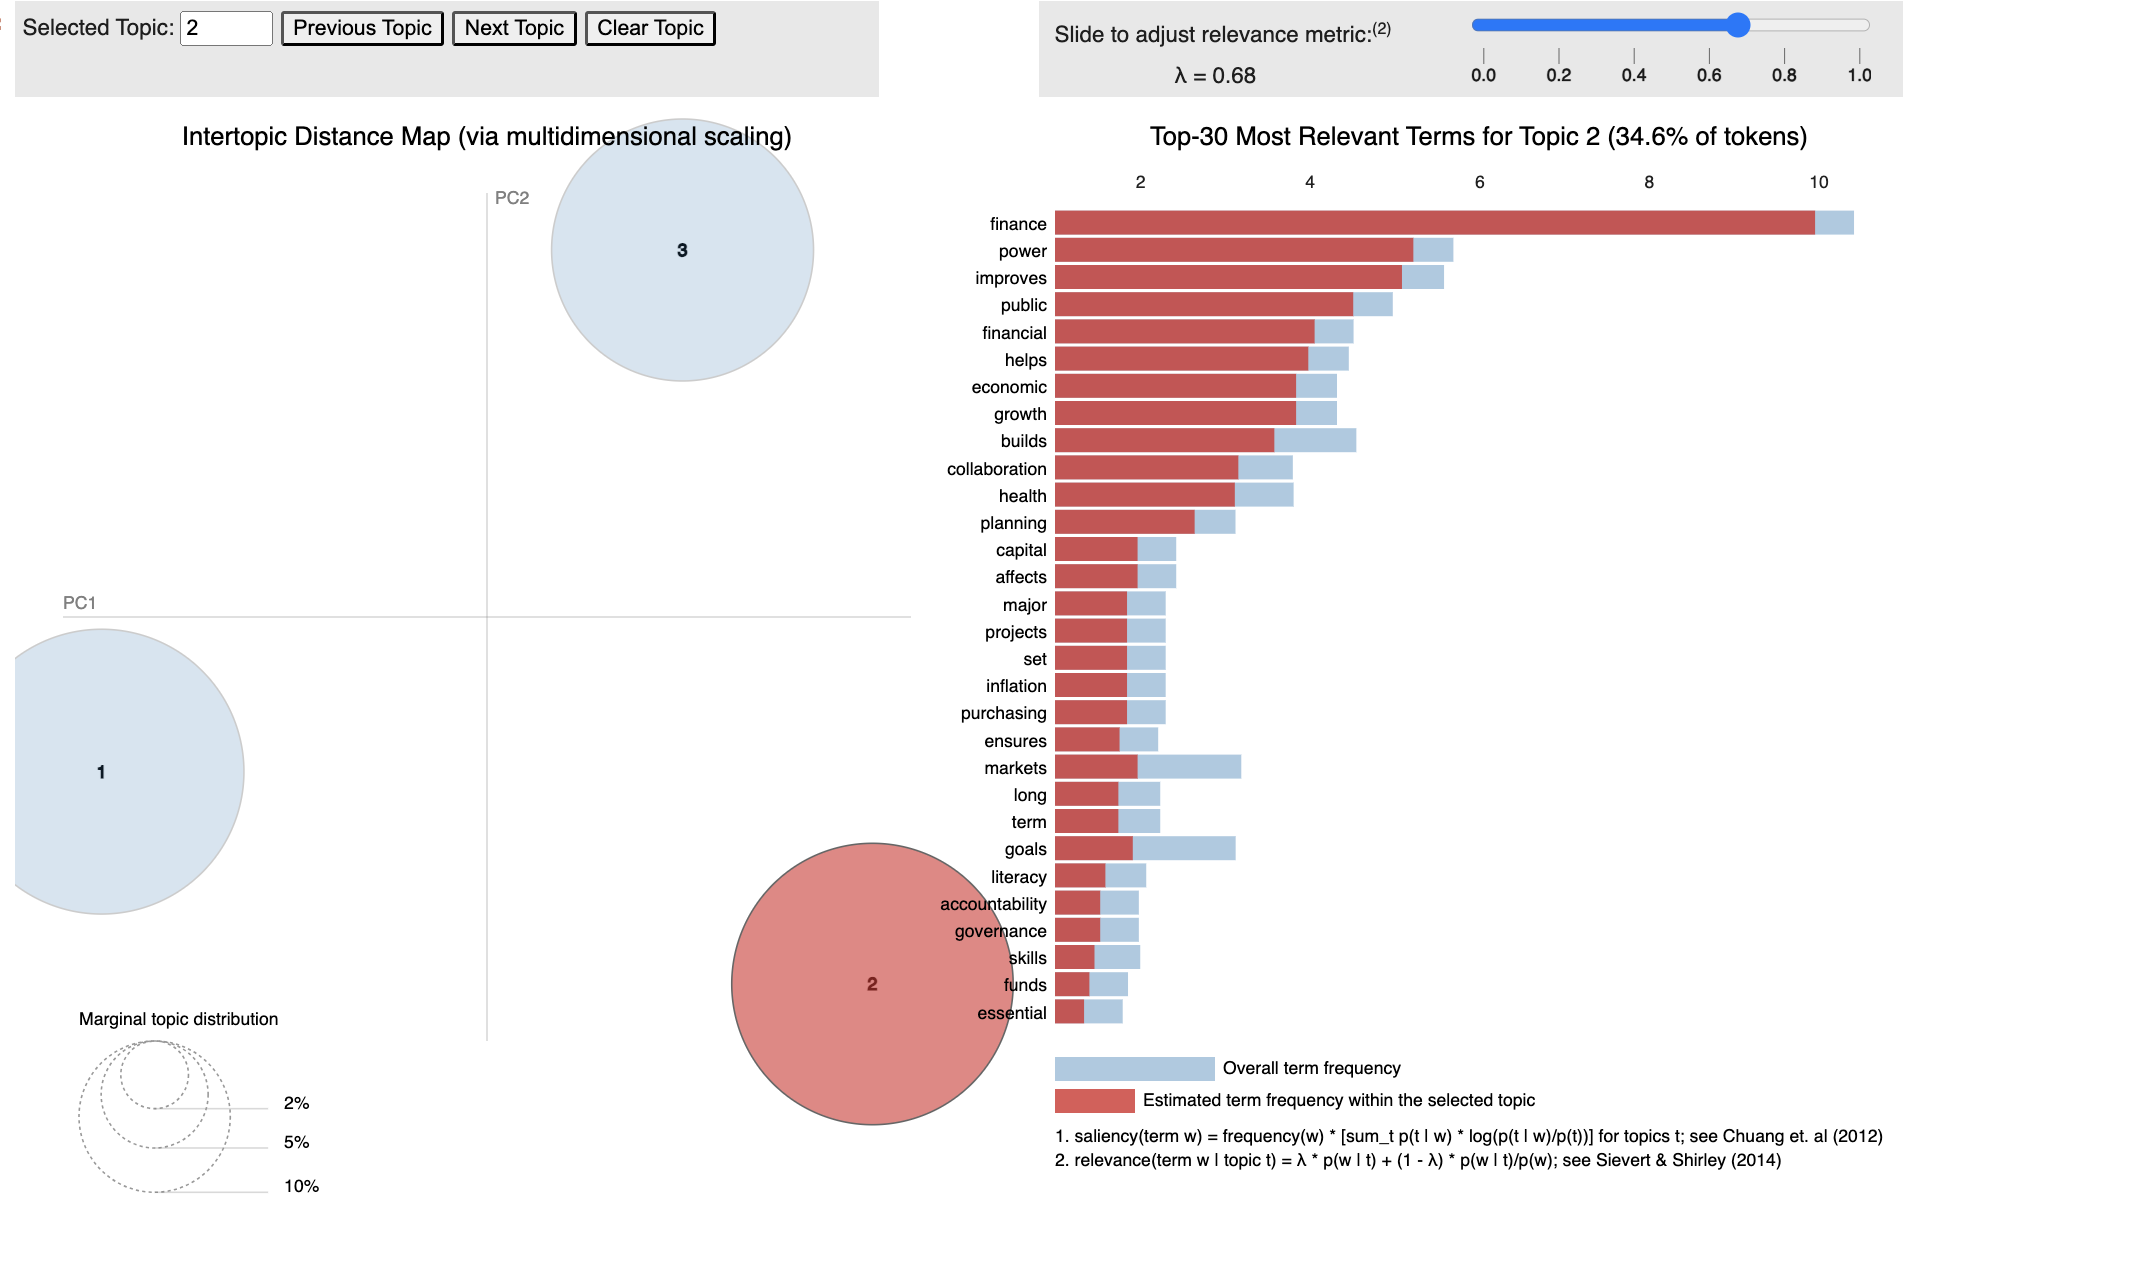

In [50]:
vis_train

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.156681 -0.035846       1        1  35.430085
2      0.111351 -0.109679       2        1  34.598566
0      0.045330  0.145525       3        1  29.971349, topic_info=                Term       Freq      Total Category  logprob  loglift
3             energy   9.000000   9.000000  Default  30.0000  30.0000
43         education  11.000000  11.000000  Default  29.0000  29.0000
22           finance   9.000000   9.000000  Default  28.0000  28.0000
45          learning   8.000000   8.000000  Default  27.0000  27.0000
9              power   5.000000   5.000000  Default  26.0000  26.0000
..               ...        ...        ...      ...      ...      ...
116  electrification   1.054067   1.477760   Topic3  -4.8823   0.8671
70         resources   0.991856   1.402210   Topic3  -4.9431   0.8587
233      flexibility   1.283980   1.878689   Topic3  -4.6850   0.8243
234          manages   1.283980   1.878689   Topic3  -4.6850   0.8243
235         variable   1.283980   1.878689   Topic3  -4.6850   0.8243

[128 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
54        1  0.927927          access
244       2  0.529143  accountability
253       1  0.953039     achievement
85        2  0.874682         affects
96        1  0.897334          aligns
...     ...       ...             ...
154       3  0.782678         systems
185       2  0.944786            term
259       1  0.822981           tools
247       1  0.953039          values
235       3  0.532286        variable

[105 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

##### Inference

In [47]:
pyLDAvis.enable_notebook()
vis_inference = pyLDAvis.gensim.prepare(lda_model, inf_corpus, dictionary=lda_model.id2word)

In [48]:
vis_inference

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.156681  0.035846       1        1  48.810200
0      0.045330 -0.145525       2        1  47.141839
2      0.111351  0.109679       3        1   4.047960, topic_info=          Term      Freq     Total Category  logprob  loglift
3       energy  0.000000  0.000000  Default  30.0000  30.0000
43   education  0.000000  0.000000  Default  29.0000  29.0000
45    learning  0.000000  0.000000  Default  28.0000  28.0000
22     finance  0.000000  0.000000  Default  27.0000  27.0000
26      builds  0.000000  0.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
142     skills  0.001431  0.007552   Topic3  -4.7285   1.5437
20     savings  0.001222  0.006537   Topic3  -4.8862   1.5304
82   influence  0.001179  0.006402   Topic3  -4.9223   1.5151
80     markets  0.001893  0.016480   Topic3  -4.4491   1.0428
39       goals  0.001841  0.016010   Topic3  -4.4766   1.0442

[126 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

##### Output html 

- Could also be plotted in a dashboard, depending on customer preferences.

In [55]:
os.chdir(dir_viz)
pyLDAvis.save_html(vis_train, os.getcwd() +"/vis_train.html")
pyLDAvis.save_html(vis_inference, os.getcwd() +"/vis_inference.html")

## LSA

https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

In [49]:
# some implementations name 'train_dictionary' as 'id2word', but to me that's not very clear
train_data, train_corpus_data, train_corpus, train_dictionary = lda.automate_corpus_prep(train, 'train_raw')

preprocessed...
tokenized...
dictionary and corpus created


### Vectorizer / Doc Term Matrix

In [46]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [41]:
#lsa_vectorizer = TfidfVectorizer(stop_words='english', 
#                             use_idf=True, 
#                             smooth_idf=True)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(min_df=1, stop_words='english')
bag_of_words = vectorizer.fit_transform(train_data.corpus_clean)

### dimensionality reduction

In [82]:
svd = TruncatedSVD(n_components=2,
                    algorithm='randomized',
                    n_iter=10)

### get LSA matrix

In [83]:
lsa = svd.fit_transform(bag_of_words)

### get labels - topic encoded

In [86]:
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2"])
topic_encoded_df['sentence'] = train_data.corpus_clean
#topic_encoded_df['Is_Poe'] = (body_df.title == "The Raven")
topic_encoded_df.head()

,topic_1,topic_2,sentence
0,1.098151,-0.414449,energy efficiency reduces costs and emissions
1,1.054439,-0.217168,renewable energy supports a cleaner grid
2,1.045030,-0.440328,energy storage stabilizes power supply
3,0.977342,-0.410175,smart grids optimize energy distribution
4,0.980860,-0.412691,energy audits identify savings opportunities


#### dictionary and encoding matrix

In [ ]:
dictionary = vectorizer.get_feature_names()

In [ ]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=['topic_1', 'topic_2']).T
encoding_matrix["terms"] = dictionary
display(encoding_matrix)

### Visualize w/ dimension reduction

#### UMAP

In [71]:
embedding = umap.UMAP(n_neighbors = 10, min_dist = 0.5, random_state = 0).fit_transform(lsa_matrix)

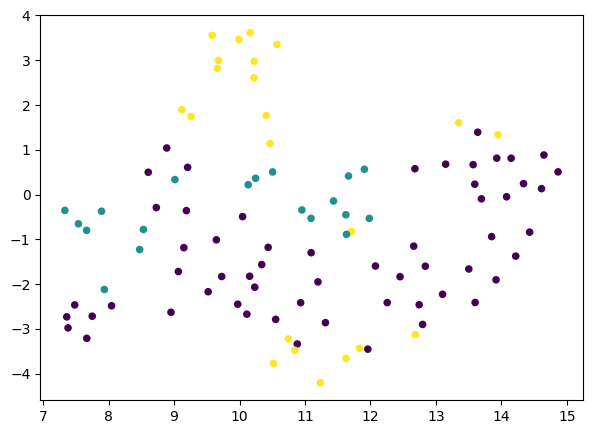

In [72]:
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c = labels_kmeans,
            s = 30, # size
            edgecolor='none'
            )
plt.show()

#### apply to tsne

In [73]:
tsne_lsa_model = TSNE(n_components = 3, # this is predefined above
                      perplexity = 50, 
                      learning_rate = 100, 
                      n_iter = 2000, 
                      verbose = 1, 
                      random_state = 0, 
                      angle = 0.75)

In [74]:
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_matrix)

[t-SNE] Computing 98 nearest neighbors...
[t-SNE] Indexed 99 samples in 0.000s...
[t-SNE] Computed neighbors for 99 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 99 / 99
[t-SNE] Mean sigma: 0.330810
[t-SNE] KL divergence after 250 iterations with early exaggeration: 120.208664
[t-SNE] KL divergence after 2000 iterations: 1.106400


In [ ]:
## plot




# Clustering

### 1. Vectorizer

#### Using TFIDF for vectorizer

https://medium.com/@RobuRishabh/clustering-text-data-with-k-means-and-visualizing-with-t-sne-9bc1fe7d8fed

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X_vectorized = vectorizer.fit_transform(list(train_data['corpus_clean']))

In [17]:
X_vectorized.shape
# represents each document as a vector

(99, 271)

#### Other techniques

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#vectorizer = CountVectorizer()
#doc_term_matrix = vectorizer.fit_transform(list(train_data['corpus_clean']))
#doc_term_matrix

In [ ]:
#doc_term_matrix[1]

In [ ]:
#######
####### Loop through: (t-SNE, UMAP) x (k-means, DBSCAN, HDBSCAN)
####### Vis each scatterplots in subplots
#######

### 2. Dimensionality Reduction

#### t-SNE

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

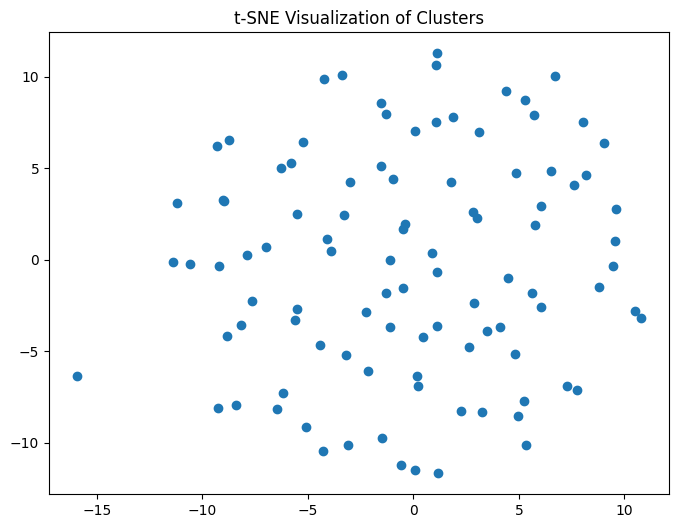

In [28]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_vectorized.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], #c=labels, 
            cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters')
plt.show()

#### UMAP

In [21]:
X_UMAP = umap.UMAP(n_components = 2, min_dist = 0.0, metric = 'cosine', random_state = 42).fit_transform(X_vectorized)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


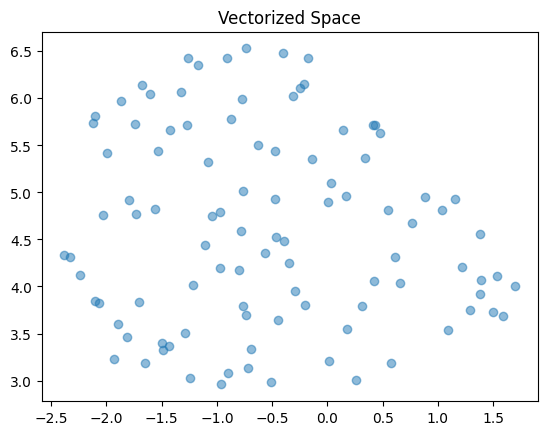

In [24]:
plt.scatter(X_UMAP[:, 0], X_UMAP[:,1], alpha = 0.5)
plt.title("Vectorized Space")
plt.show()

### 3. Clustering

#### k-means

In [26]:
from sklearn.cluster import KMeans

# Number of clusters (choose based on your dataset)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_vectorized)

# Output the cluster labels for each document
labels_kmeans = kmeans.labels_
print("Cluster Labels:", labels_kmeans)

Cluster Labels: [0 0 0 0 0 2 2 0 0 0 1 1 1 1 0 0 0 0 2 2 2 0 0 0 0 1 0 0 0 1 0 0 0 0 2 2 0
 0 0 0 2 1 1 0 2 0 2 1 1 1 0 0 0 0 2 0 0 2 2 1 2 0 0 0 0 0 0 0 0 2 2 0 0 2
 1 2 1 0 0 0 0 0 0 0 2 2 2 0 0 1 1 1 1 0 0 0 2 1 0]


#### DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

In [33]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
labels_dbscan = dbscan.fit_predict(X_vectorized)

#### HDBSCAN

### 4. Visualize labels with each dimension reduction technique

- create subplots before the loop then add a trace for each row, col (index) - reduction x clustering model combinations

#### t-SNE

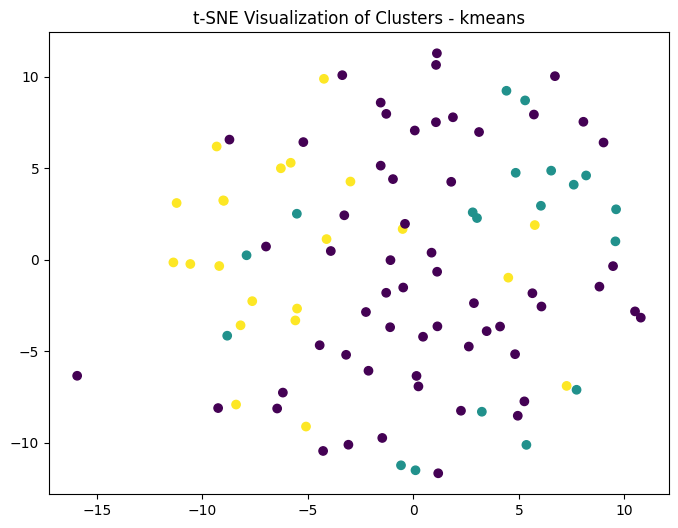

In [34]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_vectorized.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters - kmeans')
plt.show()

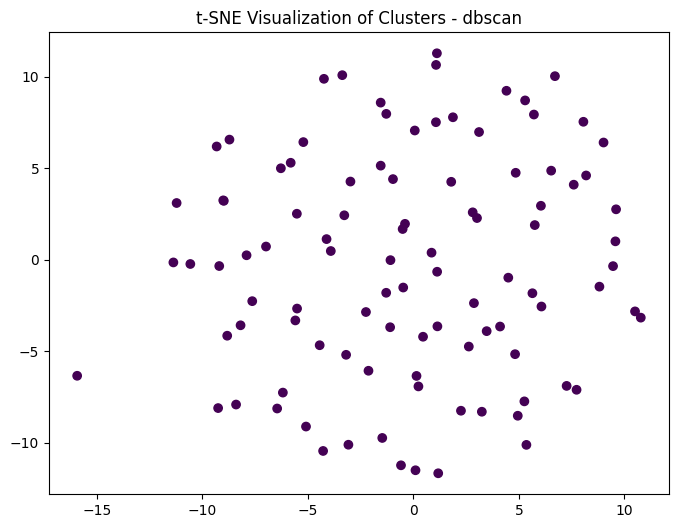

In [37]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_vectorized.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters - dbscan')
plt.show()

#### UMAP

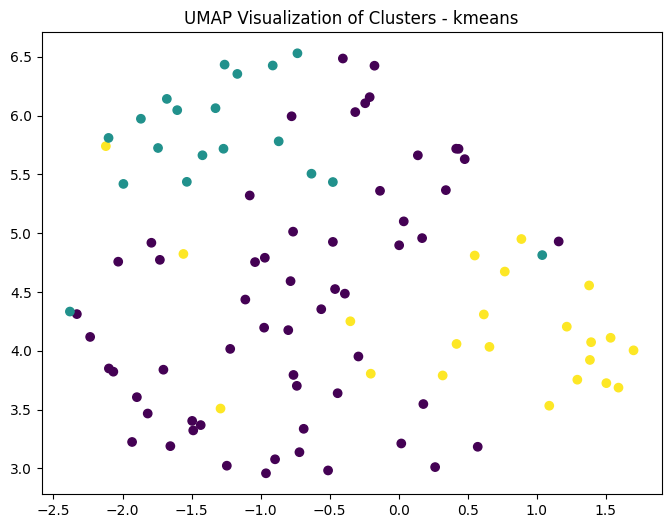

In [38]:
#### not too bad - I think there is not enough data / dimensions to use DBSCAN below
#### UMAP clearly better distinguishes the 

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=labels_kmeans, cmap='viridis', marker='o')
plt.title('UMAP Visualization of Clusters - kmeans')
plt.show()

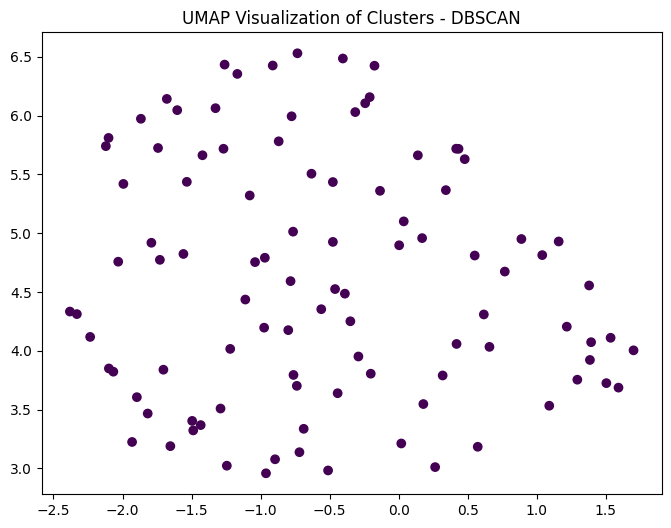

In [39]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_UMAP[:, 0], X_UMAP[:, 1], c=labels_dbscan, cmap='viridis', marker='o')
plt.title('UMAP Visualization of Clusters - DBSCAN')
plt.show()

# 